# PLASTIC SALES DATASET
Using the above dataset to do time series forecasting.

## BUSINESS OBJECTIVE
* Maximize Profit
* Minimize Loss
* Maximize Quality
* Maximize Sales

## CONSTRAINTS
* Raw material availability
* High competition


## DATA DICTIONARY

| **slno** | **Name of Feature** | **Description**                                                                                                          | **Type** | **Relevance** |
|:--------:|:-------------------|:--------------------------------------------------------------------------------------------------------------------------|:--------:|:-------------:|
| 1 | Month | It gives the month in which the data was gathered | Nominal   | Relevant      |
| 2 | Sales | The number of Sales in the Quarter | Ratio   | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass28\PlasticSales.csv")
df=df0.copy()
df.head()

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030


### DATA UNDERSTANDING & PREPROCESSING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(60, 2)

In [4]:
df.dtypes

Month    object
Sales     int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   60 non-null     object
 1   Sales   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,Sales
count,60.000000
mean,1162.366667
std,266.431469
min,697.000000
25%,947.750000
50%,1148.000000
75%,1362.500000
max,1637.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number and Percentage of Missing Values in the Dataset.

In [8]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 Month    0
Sales    0
dtype: int64


Using the custom function to get the first two characters of the Quarter variable and saving it to another variable called Months.

In [9]:
df['Months']= 0

for i in range(60):
    p = df['Month'][i]
    df['Months'][i]= p[0:3]
df.head()

C:\Users\lenny\AppData\Local\Temp\ipykernel_5524\2489545327.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Months'][i]= p[0:3]


,Month,Sales,Months
0,Jan-49,742,Jan
1,Feb-49,697,Feb
2,Mar-49,776,Mar
3,Apr-49,898,Apr
4,May-49,1030,May


Checking the number of unique values in each variable. 

In [10]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 Month     60
Sales     59
Months    12
dtype: int64


creating a column t for time index , t_square for squared time index & log_sales for building exponential model

In [11]:
df["t"] = np.arange(1,61)
df["t_square"] = df["t"] * df["t"]
df["log_Sales"] = np.log(df["Sales"])
df.head(5)

,Month,Sales,Months,t,t_square,log_Sales
0,Jan-49,742,Jan,1,1,6.609349
1,Feb-49,697,Feb,2,4,6.546785
2,Mar-49,776,Mar,3,9,6.654153
3,Apr-49,898,Apr,4,16,6.800170
4,May-49,1030,May,5,25,6.937314


Creating dummy variables of the months variable. 

In [12]:
Quarter_dummies = pd.DataFrame(pd.get_dummies(df['Months']))
df1 = pd.concat([df, Quarter_dummies], axis = 1)
df1.head(5)

,Month,Sales,Months,t,t_square,log_Sales,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-49,742,Jan,1,1,6.609349,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-49,697,Feb,2,4,6.546785,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-49,776,Mar,3,9,6.654153,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-49,898,Apr,4,16,6.800170,1,0,0,0,0,0,0,0,0,0,0,0
4,May-49,1030,May,5,25,6.937314,0,0,0,0,0,0,0,0,1,0,0,0


Creating a new dataframe which would be used to forecast the data for the next 1 Year(12 months). 

In [13]:
df_new = df1.iloc[0:12,:] 
df_new.drop(['Month','Sales','Months','t','t_square','log_Sales'],axis=1,inplace=True)
df_new["t"] = np.arange(61,73)
df_new["t_square"] = df_new["t"] * df_new["t"]
df_new.reset_index(drop=True, inplace=True)
df_new.head()

C:\Users\lenny\AppData\Local\Temp\ipykernel_5524\1513180097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(['Month','Sales','Months','t','t_square','log_Sales'],axis=1,inplace=True)
C:\Users\lenny\AppData\Local\Temp\ipykernel_5524\1513180097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["t"] = np.arange(61,73)
C:\Users\lenny\AppData\Local\Temp\ipykernel_5524\1513180097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square
0,0,0,0,0,1,0,0,0,0,0,0,0,61,3721
1,0,0,0,1,0,0,0,0,0,0,0,0,62,3844
2,0,0,0,0,0,0,0,1,0,0,0,0,63,3969
3,1,0,0,0,0,0,0,0,0,0,0,0,64,4096
4,0,0,0,0,0,0,0,0,1,0,0,0,65,4225


### VISUALIZATION - TIME PLOT
Plotting the time plot. 

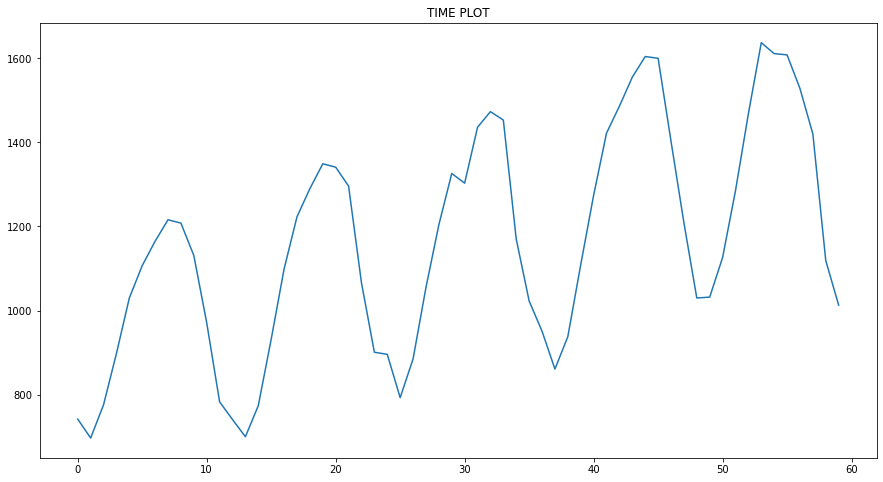

In [14]:
plt.figure(figsize=(15,8))
df1.Sales.plot()
plt.title("TIME PLOT")
plt.show()

From the above plot we can see that it has level , an upward Trend and Seasonality is present. 

### DATA PARTITION
Partioning the data into train and test data. 

In [15]:
Train = df1.head(48)
Test = df1.tail(12)

### MODEL BUILDING

__TESTING DIFFERENT MODELS__

Importing the library required for building the model.

In [16]:
import statsmodels.formula.api as smf 

__Linear Model__

In [17]:
linear_model = smf.ols('Sales ~ t', data = Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(pred_linear))**2))
rmse_linear

260.93781425111246

__Exponential Model__

In [18]:
Exp = smf.ols('log_Sales ~ t', data = Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(np.exp(pred_Exp)))**2))
rmse_Exp

268.6938385002614

__Quadratic Model__

In [19]:
Quad = smf.ols('Sales ~ t + t_square', data = Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t", "t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(pred_Quad))**2))
rmse_Quad

297.40670972721136

__Additive Seasonality__

In [20]:
df1.columns

Index(['Month', 'Sales', 'Months', 't', 't_square', 'log_Sales', 'Apr', 'Aug',
       'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [21]:
add_sea = smf.ols('Sales ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Apr', 'Aug','Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(pred_add_sea))**2))
rmse_add_sea

235.6026735664656

__Multiplicative Seasonality__

In [22]:
Mul_sea = smf.ols('log_Sales ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

239.6543214312118

__Additive Seasonality with Linear Trend__

In [23]:
add_sea_lin = smf.ols('Sales ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea_lin = pd.Series(add_sea_lin.predict(Test[['Apr', 'Aug','Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep','t']]))
rmse_add_sea_lin = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_lin))**2))
rmse_add_sea_lin 

135.55359583482164

__Additive Seasonality with Quadratic Trend__

In [24]:
add_sea_Quad = smf.ols('Sales ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Apr', 'Aug','Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

218.19387584892843

__Multiplicative Seasonality with Linear Trend__

In [25]:
Mul_Add_sea = smf.ols('log_Sales ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

160.6833294719332

__Multiplicative Seasonality with Quadratic Trend__

In [26]:
Mul_Add_sea_quad = smf.ols('log_Sales ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea_quad = pd.Series(Mul_Add_sea_quad.predict(Test))
rmse_Mult_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea_quad)))**2))
rmse_Mult_add_sea_quad 

239.60602992997434

__MODEL COMPARISONS__

In [27]:
data = {"MODEL":pd.Series(["Linear Model RMSE","Exponential Model RMSE","Quadratic Model RMSE","Additive Seasonality Model RMSE","Additive Seasonality with Linear Trend RMSE","Additive Seasonality with Quadratic Trend RMSE","Multiplicative Seasonality Model RMSE","Multiplicative Seasonality with Linear Trend RMSE","Multiplicative Seasonality with Quadratic Trend RMSE"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_lin,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea,rmse_Mult_add_sea_quad])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,Linear Model RMSE,260.937814
1,Exponential Model RMSE,268.693839
2,Quadratic Model RMSE,297.406710
3,Additive Seasonality Model RMSE,235.602674
4,Additive Seasonality with Linear Trend RMSE,135.553596
5,Additive Seasonality with Quadratic Trend RMSE,218.193876
6,Multiplicative Seasonality Model RMSE,239.654321
7,Multiplicative Seasonality with Linear Trend RMSE,160.683329
8,Multiplicative Seasonality with Quadratic Tren...,239.606030


On comparison of the different models the Additive Seasonality with Linear Trend Model is giving the lowest RMSE value so using this model for Model building

__BUILDING THE MODEL AND FORECASTING__

Building the model on the entire dataset. 

In [28]:
full_model = smf.ols('Sales ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data=df1).fit()

Forecasting the data for the next 12 months using the best model i.e. Additive Seasonality with Linear Trend.The forecasted data is stored in the variable 'Sales'.

In [29]:
df_new['Sales']=pd.Series(full_model.predict(df_new))
df_new.head()

C:\Users\lenny\AppData\Local\Temp\ipykernel_5524\2206157295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Sales']=pd.Series(full_model.predict(df_new))


,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,Sales
0,0,0,0,0,1,0,0,0,0,0,0,0,61,3721,1147.15
1,0,0,0,1,0,0,0,0,0,0,0,0,62,3844,1091.75
2,0,0,0,0,0,0,0,1,0,0,0,0,63,3969,1174.95
3,1,0,0,0,0,0,0,0,0,0,0,0,64,4096,1330.95
4,0,0,0,0,0,0,0,0,1,0,0,0,65,4225,1490.15


The forecasted data is not free from erros so we will calculate the error value of the original dataset and use the auto regression to bring the error's to as low as possible and also forecast the errors for the next 12 Months which will then be added to the forecasted data. 

Predicting the Passengers variable using the full_model and saving the results into a new variable. 

In [30]:
df1["Forecasted_Sales1"]= pd.Series(full_model.predict(df1))
df1.head(5)

,Month,Sales,Months,t,t_square,log_Sales,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Forecasted_Sales1
0,Jan-49,742,Jan,1,1,6.609349,0,0,0,0,1,0,0,0,0,0,0,0,688.566667
1,Feb-49,697,Feb,2,4,6.546785,0,0,0,1,0,0,0,0,0,0,0,0,633.166667
2,Mar-49,776,Mar,3,9,6.654153,0,0,0,0,0,0,0,1,0,0,0,0,716.366667
3,Apr-49,898,Apr,4,16,6.800170,1,0,0,0,0,0,0,0,0,0,0,0,872.366667
4,May-49,1030,May,5,25,6.937314,0,0,0,0,0,0,0,0,1,0,0,0,1031.566667


### AUTOREGRESSION(AR)

Using the autoregression model to reduce the errors, so will calculate the residuals(errors) from best model applied on full data. 

In [31]:
Residuals1 = df1.Sales - df1.Forecasted_Sales1
Residuals1

0      53.433333
1      63.833333
2      59.633333
3      25.633333
4      -1.566667
5     -52.566667
6     -22.566667
7     -33.366667
8     -39.366667
9     -65.566667
10      8.633333
11    -19.366667
12    -39.283333
13    -24.883333
14    -34.083333
15    -32.083333
16    -24.283333
17    -28.283333
18     10.716667
19      7.916667
20      1.916667
21      7.716667
22     11.916667
23      6.916667
24     24.000000
25    -23.600000
26    -14.800000
27     -0.800000
28    -11.000000
29    -17.000000
30    -68.000000
31      3.200000
32     42.200000
33     73.000000
34     24.200000
35     37.200000
36    -12.716667
37    -47.316667
38    -53.516667
39    -38.516667
40    -32.716667
41    -12.716667
42     23.283333
43     30.483333
44     81.483333
45    128.283333
46    165.483333
47    131.483333
48    -25.433333
49     31.966667
50     42.766667
51     45.766667
52     69.566667
53    110.566667
54     56.566667
55     -8.233333
56    -86.233333
57   -143.433333
58   -210.2333

Importing the library required to plot the ACF and PACF plots.

In [32]:
import statsmodels.graphics.tsaplots as tsa_plots

Plotting the ACF plot.

<Figure size 1800x1296 with 0 Axes>

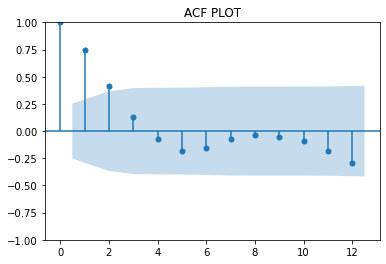

In [33]:
plt.figure(figsize=(25,18))
tsa_plots.plot_acf(Residuals1, lags = 12)
plt.title("ACF PLOT")
plt.show()

Plotting the PACF plot. 

C:\Users\lenny\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1080x576 with 0 Axes>

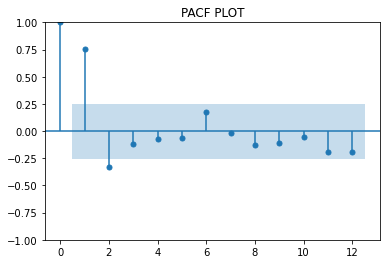

In [34]:
plt.figure(figsize=(15,8))
tsa_plots.plot_pacf(Residuals1, lags = 12)
plt.title("PACF PLOT")
plt.show()

From the acf and pacf plot we can see that lag1 is the best option. 

Importing the library required to build the AR model.

In [35]:
from statsmodels.tsa.ar_model import AutoReg

Building the model on the first set of residuals obtained from the Additive seasonality with linear trend model. 

In [36]:
model_ar = AutoReg(Residuals1, lags=[1])

Fitting the model. 

In [37]:
model_fit = model_ar.fit()

Checking the coefficients of the model. 

In [38]:
print('Coefficients: %s' % model_fit.params)

Coefficients: const   -3.097434
y.L1     0.827706
dtype: float64


Predicting the errors using the autoregression model. 

In [39]:
pred_res = model_fit.predict()
pred_res.reset_index(drop=True, inplace=True)
pred_res

0            NaN
1      41.129664
2      49.737808
3      46.261442
4      18.119433
5      -4.394174
6     -46.607187
7     -21.776003
8     -30.715229
9     -35.681466
10    -57.367367
11      4.048429
12    -19.127343
13    -35.612491
14    -23.693522
15    -31.308419
16    -29.653006
17    -23.196899
18    -26.507723
19      5.772817
20      3.455239
21     -1.510998
22      3.289698
23      6.766064
24      2.627533
25     16.767513
26    -22.631299
27    -15.347485
28     -3.759599
29    -12.202202
30    -17.168439
31    -59.381452
32     -0.448775
33     31.831765
34     57.325114
35     16.933054
36     27.693234
37    -13.623097
38    -42.261730
39    -47.393508
40    -34.977916
41    -30.177220
42    -13.623097
43     16.174324
44     22.133808
45     64.346821
46    103.083469
47    133.874138
48    105.732129
49    -24.148761
50     23.361572
51     32.300799
52     34.783917
53     54.483323
54     88.419275
55     43.723143
56     -9.912215
57    -74.473294
58   -121.8180

The predicted errors are then added to the forecasted data and saved to another variable called forecasted_passenger2.

In [40]:
Forecasted_Sales2 = df1.Forecasted_Sales1 + pred_res
Forecasted_Sales2

0             NaN
1      674.296331
2      766.104475
3      918.628109
4     1049.686100
5     1155.172493
6     1140.959479
7     1227.590664
8     1216.651437
9     1160.885200
10     904.999299
11     806.415095
12     761.155990
13     689.270843
14     784.389811
15     932.774915
16    1093.630327
17    1228.086435
18    1252.775610
19    1346.856150
20    1342.538573
21    1286.772336
22    1057.373031
23     900.849397
24     874.627533
25     833.367513
26     877.168701
27    1040.452515
28    1211.240401
29    1330.797798
30    1353.831561
31    1373.418548
32    1430.351225
33    1411.831765
34    1203.125114
35    1002.733054
36     991.409901
37     894.693569
38     949.254937
39    1100.123158
40    1271.738751
41    1404.539446
42    1449.093569
43    1540.690990
44    1544.650475
45    1536.063488
46    1340.600136
47    1211.390804
48    1161.165462
49     975.884573
50    1106.594905
51    1271.534132
52    1433.217250
53    1580.916657
54    1642.852609
55    1659

In [41]:
df1["Forecasted_Sales2"] = pd.Series(Forecasted_Sales2)
df1.head(5)

,Month,Sales,Months,t,t_square,log_Sales,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Forecasted_Sales1,Forecasted_Sales2
0,Jan-49,742,Jan,1,1,6.609349,0,0,0,0,1,0,0,0,0,0,0,0,688.566667,NaN
1,Feb-49,697,Feb,2,4,6.546785,0,0,0,1,0,0,0,0,0,0,0,0,633.166667,674.296331
2,Mar-49,776,Mar,3,9,6.654153,0,0,0,0,0,0,0,1,0,0,0,0,716.366667,766.104475
3,Apr-49,898,Apr,4,16,6.800170,1,0,0,0,0,0,0,0,0,0,0,0,872.366667,918.628109
4,May-49,1030,May,5,25,6.937314,0,0,0,0,0,0,0,0,1,0,0,0,1031.566667,1049.686100


Dropping the nan value from the dataset using the dropna function of the pandas library. 

In [42]:
df1.dropna(inplace=True)

The RMSE value is calculated to check the improvement in the data after filtering the residuals. 

In [43]:
rmse1 = np.sqrt(np.mean((np.array(df1["Sales"]) - np.array(df1["Forecasted_Sales2"]))**2))
rmse1

39.20813021776819

From the rmse we can see that it is very low which is very helpful in forecasting the data accurately. 

Predicting the next 12 months error using the same auto regression model. 

In [44]:
new_residuals = model_fit.predict(start=len(df1), end=len(df1)+12-1, dynamic=False)
new_residuals.reset_index(drop=True, inplace=True)
new_residuals

0    -177.108856
1    -132.412724
2    -112.696260
3     -96.376821
4     -82.869122
5     -71.688715
6     -62.434625
7     -54.774957
8     -48.435003
9     -43.187384
10    -38.843897
11    -35.248767
dtype: float64

The predicted errors are added to the passenger variable in the df_new dataset which has the forecasted passenger data. This data is then added as new passenger variable in the same dataframe. 

In [45]:
final_pred = df_new.Sales + new_residuals
final_pred

0      970.041144
1      959.337276
2     1062.253740
3     1234.573179
4     1407.280878
5     1546.461285
6     1583.715375
7     1653.175043
8     1657.514997
9     1611.962616
10    1382.106103
11    1225.701233
dtype: float64

In [46]:
df_new['New_Sales']=pd.Series(final_pred)
df_new.head()

C:\Users\lenny\AppData\Local\Temp\ipykernel_5524\1648309088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['New_Sales']=pd.Series(final_pred)


,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,Sales,New_Sales
0,0,0,0,0,1,0,0,0,0,0,0,0,61,3721,1147.15,970.041144
1,0,0,0,1,0,0,0,0,0,0,0,0,62,3844,1091.75,959.337276
2,0,0,0,0,0,0,0,1,0,0,0,0,63,3969,1174.95,1062.253740
3,1,0,0,0,0,0,0,0,0,0,0,0,64,4096,1330.95,1234.573179
4,0,0,0,0,0,0,0,0,1,0,0,0,65,4225,1490.15,1407.280878


### CONCLUSION

Thus the next 1 year passenger data is forecasted using both Additive Seasonality Linear trend model and AutoRegression(1) model. The various models are checked and their rmse values are also documented. There are total 12 dummy variables used from Jan to Dec as the seasonality is 12 as the time series is based on Monthly data. 

We can deduce that the sales will have a steady increase in the future. 